<a href="https://colab.research.google.com/github/angelinannisa/pcvk/blob/main/pcvkweek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. o to https://colab.research.google.com/ . After making sure that Google Colab is connected
to your Github , continue by selecting the repository that was used in the lab last week ,
rename the file to "Week 6 .ipynb".

Then import the existing folder on your Drive as follows.

In [1]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import the following libraries that will be used during the following week 6 practicum
trial.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :

(Use image lena.jpg) 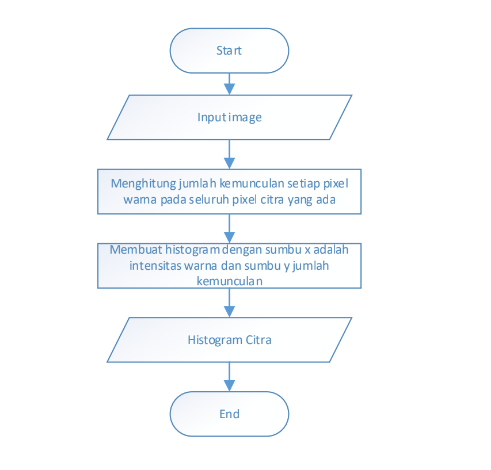

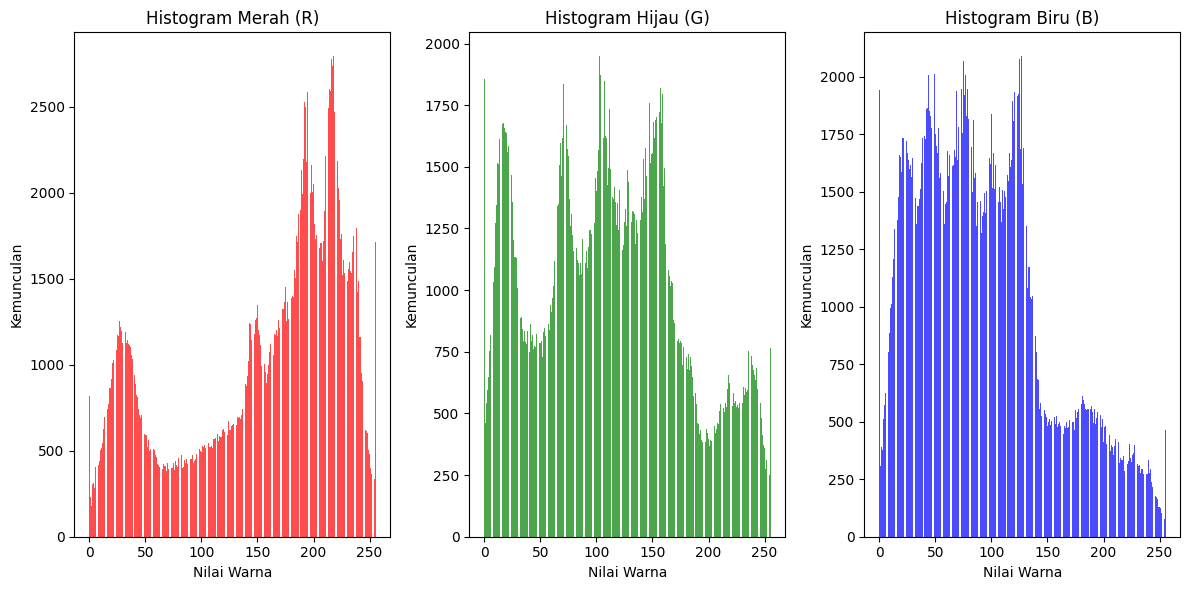

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
original = cv.imread("/content/drive/MyDrive/PCVK/lena.jpg")

# Ubah citra ke dalam skema warna RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna R, G, dan B
r, g, b = cv.split(citra_rgb)

# Hitung histogram untuk setiap saluran warna R, G, dan B
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

# Membuat tiga subplot
plt.figure(figsize=(12, 6))

# Subplot untuk histogram Merah (R)
plt.subplot(131)
plt.bar(np.arange(256), hist_r[:, 0], color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G)
plt.subplot(132)
plt.bar(np.arange(256), hist_g[:, 0], color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B)
plt.subplot(133)
plt.bar(np.arange(256), hist_b[:, 0], color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()


4.After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

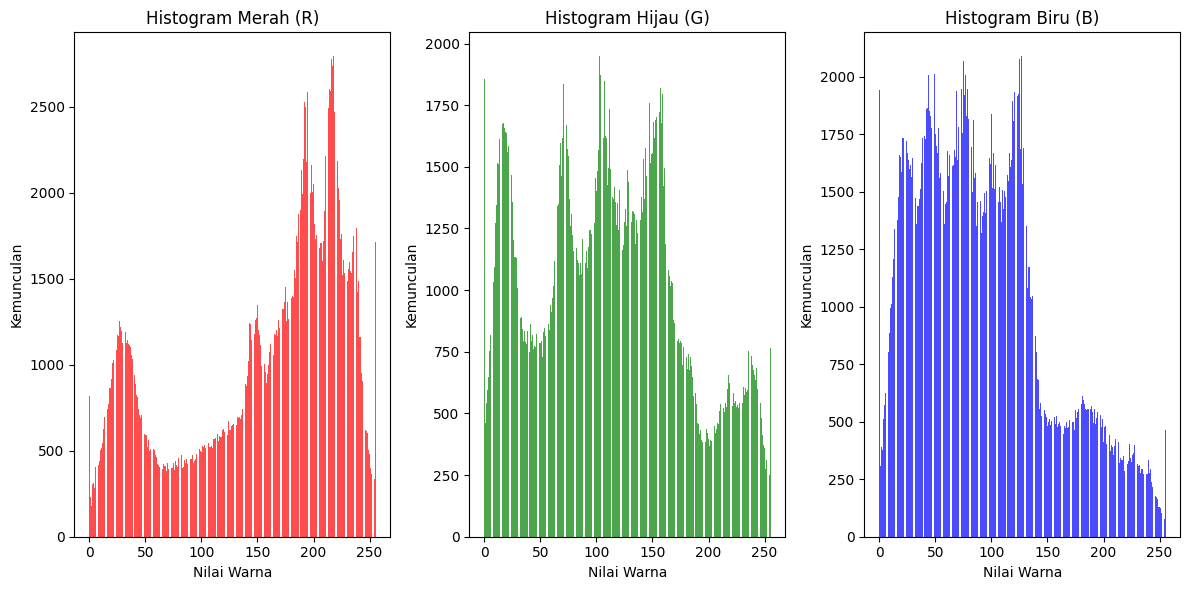

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original = cv.imread("/content/drive/MyDrive/PCVK/lena.jpg")

# Convert the image to RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Split the RGB channels
r, g, b = cv.split(citra_rgb)

# Calculate histograms using NumPy
hist_r, bins_r = np.histogram(r, bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0, 256))

# Membuat tiga subplot
plt.figure(figsize=(12, 6))

# Subplot untuk histogram Merah (R)
plt.subplot(131)
plt.bar(np.arange(256), hist_r, color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G)
plt.subplot(132)
plt.bar(np.arange(256), hist_g, color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B)
plt.subplot(133)
plt.bar(np.arange(256), hist_b, color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()

The results are the same, namely three subplots displaying histograms for the three color channels. However, there are differences in the way the histogram is calculated for the two codes.

5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

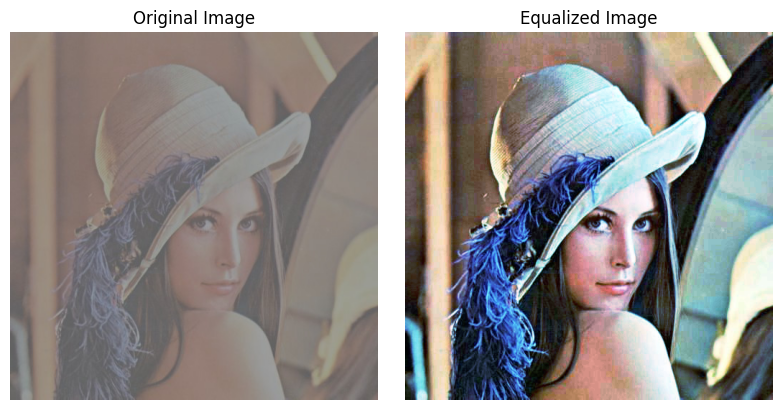

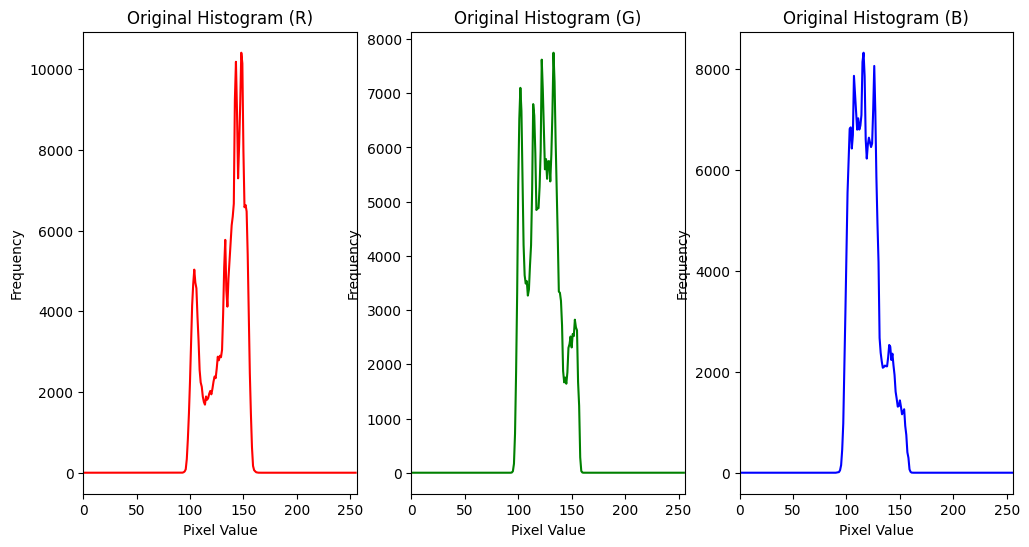

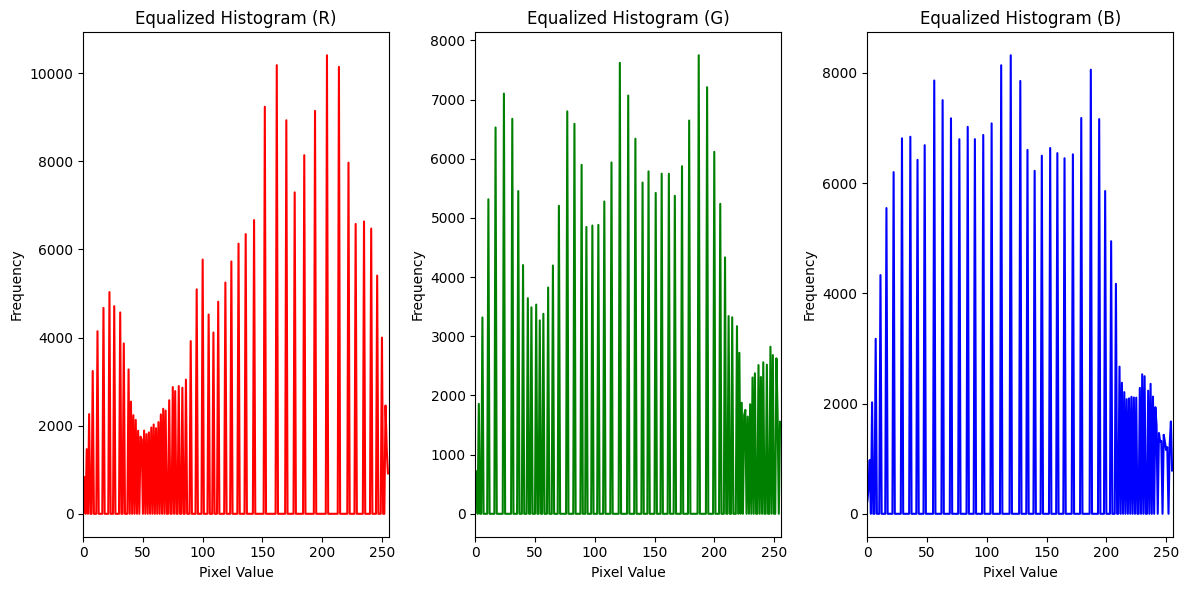

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Perform histogram equalization for each channel
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

# Calculate the histograms for the original and equalized images for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

hist_equalized_b = cv2.calcHist([equalized_b], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([equalized_g], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([equalized_r], [0], None, [256], [0, 256])

# Plot the original and equalized images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Equalized Image
plt.subplot(2, 3, 2)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()

# Plot the original and equalized histograms for each channel
plt.figure(figsize=(12, 6))

# Original Histograms
plt.subplot(131)
plt.title("Original Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Original Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Original Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_b, color='blue')
plt.xlim([0, 256])

# Equalized Histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title("Equalized Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Equalized Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Equalized Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_b, color='blue')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

6. Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)

<ipython-input-5-c35b7e719459>:71: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)  # Start a new row
<ipython-input-5-c35b7e719459>:78: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(232)
<ipython-input-5-c35b7e719459>:85: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(233)


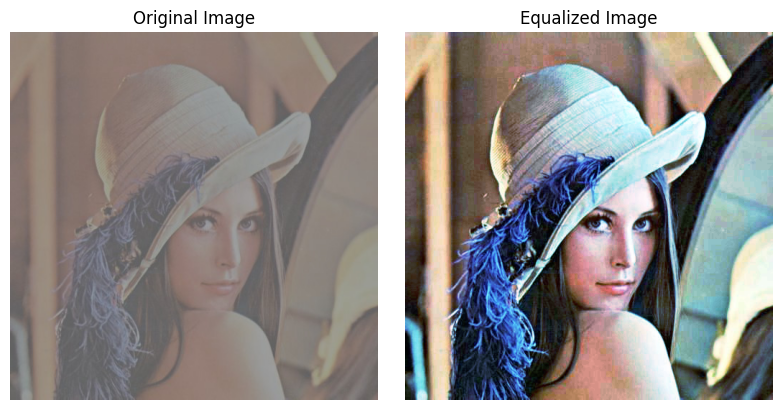

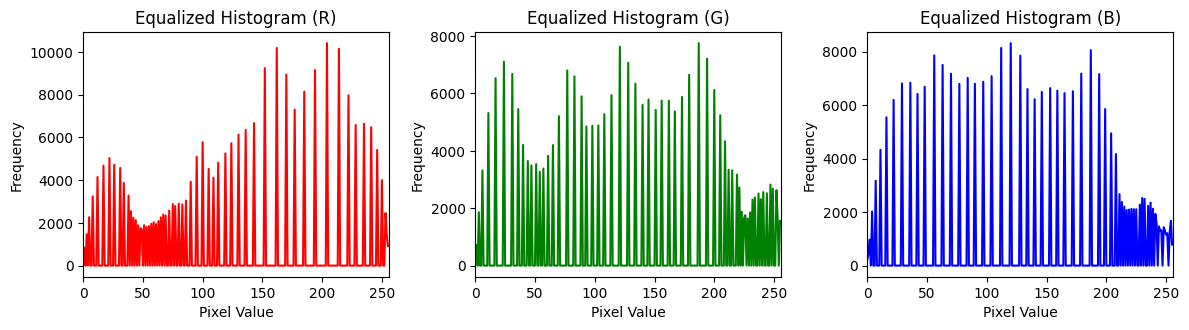

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the Lena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Perform histogram equalization for each channel
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

# Calculate the histograms for the original and equalized images for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

hist_equalized_b = cv2.calcHist([equalized_b], [0], None, [256], [0, 256])
hist_equalized_g = cv2.calcHist([equalized_g], [0], None, [256], [0, 256])
hist_equalized_r = cv2.calcHist([equalized_r], [0], None, [256], [0, 256])

# Plot the original and equalized images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Equalized Image
plt.subplot(2, 3, 2)
plt.title("Equalized Image")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the plots
plt.tight_layout()

# Plot the original and equalized histograms for each channel
plt.figure(figsize=(12, 6))

# Original Histograms
plt.subplot(131)
plt.title("Original Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_r, color='red')
plt.xlim([0, 256])

plt.subplot(132)
plt.title("Original Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_g, color='green')
plt.xlim([0, 256])

plt.subplot(133)
plt.title("Original Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_b, color='blue')
plt.xlim([0, 256])

# Equalized Histograms
plt.subplot(231)  # Start a new row
plt.title("Equalized Histogram (R)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_r, color='red')
plt.xlim([0, 256])

plt.subplot(232)
plt.title("Equalized Histogram (G)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_g, color='green')
plt.xlim([0, 256])

plt.subplot(233)
plt.title("Equalized Histogram (B)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized_b, color='blue')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

7.Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)

In [ ]:
pip install opencv-python

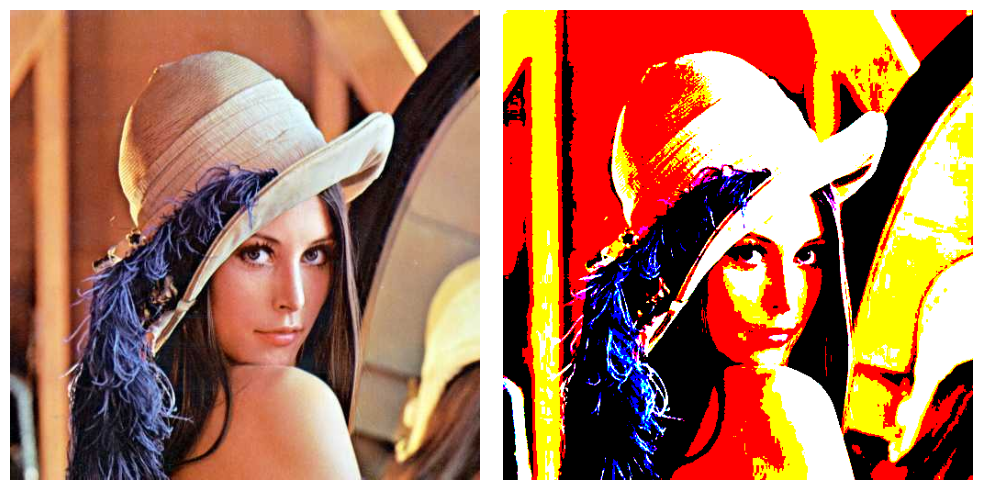

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the testlena image
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

# Display the original and neutralized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_8)
plt.axis('off')

plt.tight_layout()
plt.show()

8. Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)

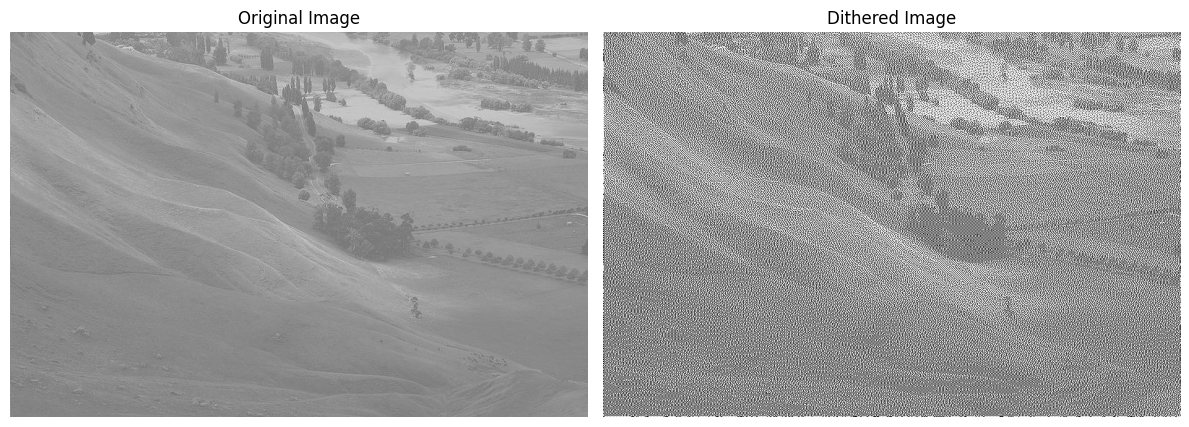

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('/content/drive/MyDrive/PCVK/wiki.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get the height and width of the image
height, width = gray_image.shape

# Create copies of the image to store the modified pixel values
dithered_image = np.copy(gray_image).astype(np.float32)

# Loop through each pixel in the image
for y in range(height - 1):
    for x in range(1, width - 1):
        # Get the old pixel value
        old_pixel = dithered_image[y, x]

        # Calculate the new pixel value based on the error
        new_pixel = round(old_pixel / 255.0) * 255.0

        # Update the pixel value in the dithered image
        dithered_image[y, x] = new_pixel

        # Calculate the quantization error
        error = old_pixel - new_pixel

        # Apply Floyd-Steinberg dithering to neighboring pixels
        dithered_image[y, x + 1] += error * 7 / 16
        dithered_image[y + 1, x - 1] += error * 3 / 16
        dithered_image[y + 1, x] += error * 5 / 16
        dithered_image[y + 1, x + 1] += error * 1 / 16

# Threshold the dithered image to get binary values (0 or 255)
dithered_image = (dithered_image > 128) * 255

# Display the original image and the dithered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Dithered Image")
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
